In [31]:
import pandas as pd
import os
import dna_features_translator_class as dftc
import seaborn as sns
import numpy as np
from importlib import reload
import utils
import random
import proseq_mito_peak_caller as pmpc
from consts import DM, HS
PATH = os.getcwd()
reload(dftc)
reload(utils)
reload(pmpc)

def run_proseq_caller(org, folder, test_dir = os.path.join(PATH, 'tests'), sample_dir = os.path.join(PATH, 'data')):
    """
    """
    try:
        os.mkdir(os.path.join(test_dir, os.path.split(folder)[-1]))
    except FileExistsError: pass
    sample_path = os.path.join(sample_dir, folder, random.choice([i for i in os.listdir(os.path.join(sample_dir, folder)) if os.path.split(i)[-1].replace(".csv","") not in [os.path.split(j)[-1].replace(".pdf","").replace('.svg','').replace('_neg','').replace('_pos','') for j in os.listdir(test_dir)] and i.endswith('.csv')]))
    sample = pd.read_csv(sample_path, index_col = 0)
    sample_name = os.path.split(sample_path)[-1].replace(".csv","")
    print(f'The choice is {sample_name}')

    folder = os.path.join(PATH, 'data', folder)
    tis_term_df = pmpc.refined_main_on_directory(folder = folder, up_window = 500, down_window = 500, specificity = 0.6, gap = 100, logging = False, reduc = 0.8, barren_range = 1000, agg_gap = 500, replace = False)
    folder_name = os.path.split(folder)[-1]
    reload(dftc)
    dataset = tis_term_df.Dataset.iloc[0]
    dftc.coverage_graph(sample = sample, plotlist = ['coverage'],strand = True, org = org, tis_term_df = tis_term_df,savefig = os.path.join(test_dir, os.path.split(folder_name)[-1], f'{folder_name}_refined_pos.svg'), peaks_annotate = True, style = 'default', despine = True, custom_title=dataset)
    dftc.coverage_graph(sample = sample, plotlist = ['coverage'],strand = False, org = org, tis_term_df = tis_term_df,savefig = os.path.join(test_dir, os.path.split(folder_name)[-1], f'{folder_name}_refined_neg.svg'), peaks_annotate = True, style = 'default', despine = True, custom_title=dataset)


The choice is SRR1596501_1_HS
Currently running: Light - TIS
Currently running: Light - TERM
Currently running: Heavy - TIS
Currently running: Heavy - TERM


No handles with labels found to put in legend.
No handles with labels found to put in legend.


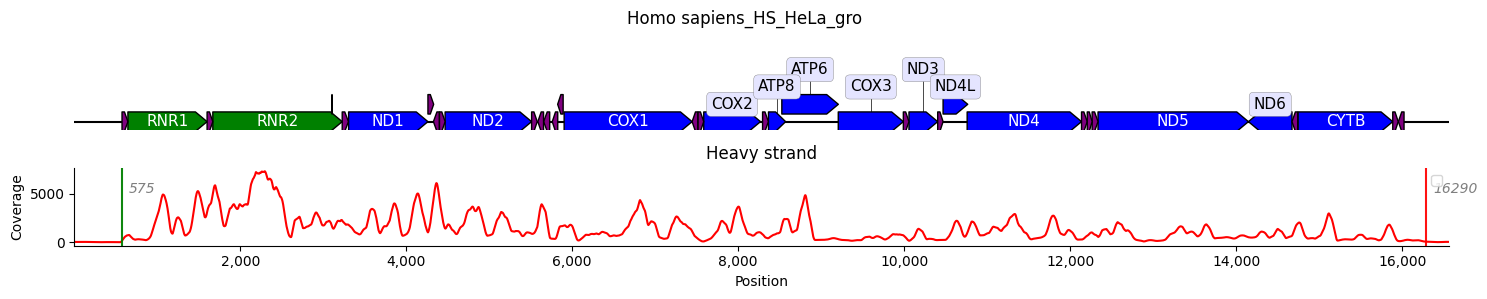

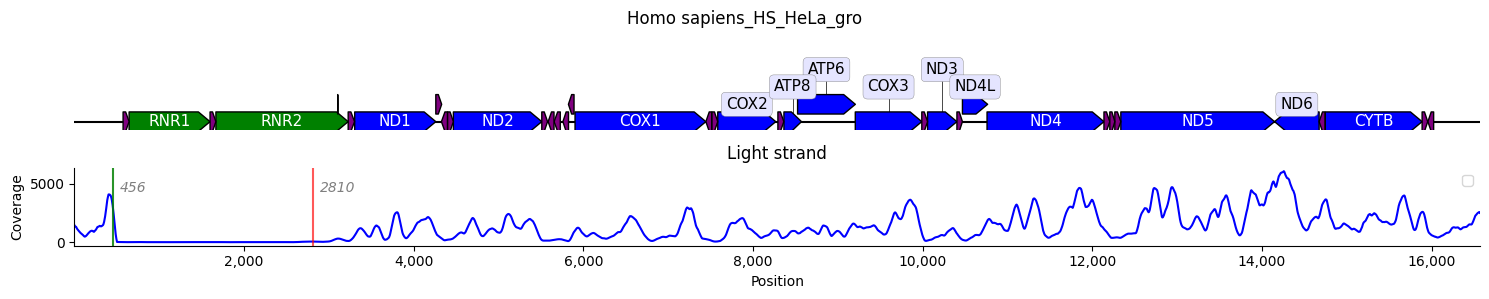

In [32]:
# Supplementary figure S4B - PRO-seq coverage and peaks of  
run_proseq_caller(org = HS, folder = 'HS_HeLa_gro')

The choice is SRR9051611_43_DM
Currently running: Light - TIS
Not enough representation for position, removing it!
Position=-1600.0
Type=TIS
Strand=Light
Not enough representation for position, removing it!
Position=5675.0
Type=TIS
Strand=Light
Currently running: Light - TERM
Not enough representation for position, removing it!
Position=-1724.0
Type=TERM
Strand=Light
Currently running: Heavy - TIS
Not enough representation for position, removing it!
Position=7136.0
Type=TIS
Strand=Heavy
Not enough representation for position, removing it!
Position=8645.0
Type=TIS
Strand=Heavy
Currently running: Heavy - TERM
Not enough representation for position, removing it!
Position=-7041.0
Type=TERM
Strand=Heavy
Not enough representation for position, removing it!
Position=-4275.0
Type=TERM
Strand=Heavy
Not enough representation for position, removing it!
Position=8863.0
Type=TERM
Strand=Heavy


No handles with labels found to put in legend.
No handles with labels found to put in legend.


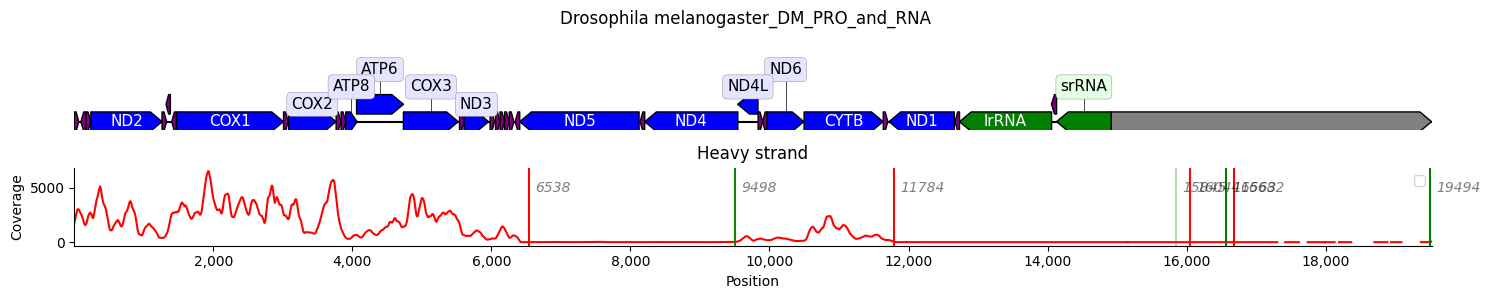

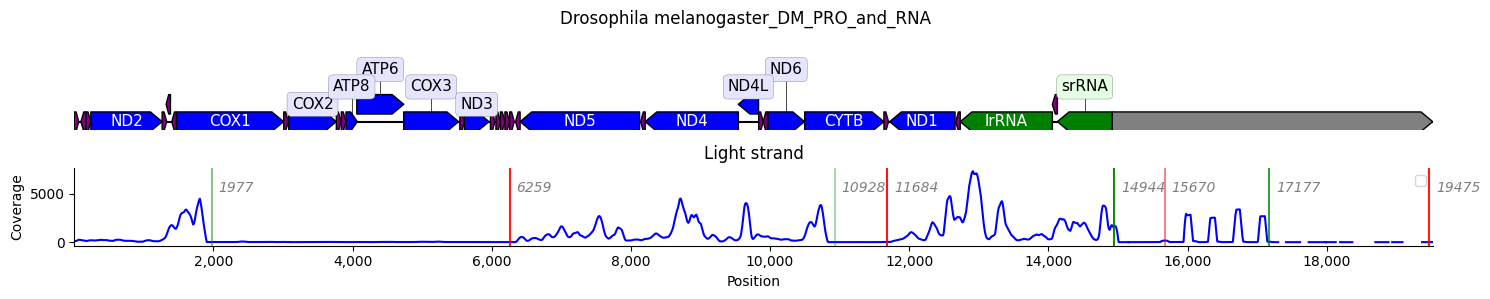

In [33]:
# Figure 4B - PRO-seq coverage and peaks of Drosophila melanogaster
run_proseq_caller(org = DM, folder = 'DM_PRO_and_RNA')